In [1]:
# Load the ClusterDC code
import os
os.chdir('Code')
%run ClusterDC.ipynb
os.chdir('..')

In [2]:
# Load the Plot code
os.chdir('Plot')
%run Plot.ipynb
os.chdir('..')

In [3]:
# Load the data.csv file as a dataframe
df = pd.read_csv('Dataset/data.csv')
df

,PaCMAP_X,PaCMAP_Y
0,3.718521,3.166199
1,3.720794,4.847405
2,2.635935,4.949351
3,8.068110,1.807240
4,9.549706,0.453575
...,...,...
18699,3.477244,-6.718595
18700,2.627150,-7.198905
18701,6.883585,-2.084337
18702,2.212480,-8.371009


In [4]:
# Extract the X and Y coordinates as numpy array
x_points = df['PaCMAP_X'].to_numpy()
y_points = df['PaCMAP_Y'].to_numpy()

In [5]:
# Run the ClusterDC algorithm
clusters, density_info = ClusterDC(x_points = x_points, y_points = y_points, selection_method = 'second_gap')

   separability   gap
0          1.00   NaN
1          0.42  0.58
2          0.36  0.06
3          0.22  0.14
4          0.21  0.00
5          0.06  0.15
6          0.03  0.02
7          0.00  0.03


In [6]:
# Print the automatic number of selected clusters
print('Number of clusters: ', len(np.unique(clusters)))

Number of clusters:  5


In [7]:
# Pick up the properties of the KDE function used
density, f, xx, yy = density_info

In [8]:
# Append the results to the original dataframe
df['Label'] = clusters
df

,PaCMAP_X,PaCMAP_Y,Label
0,3.718521,3.166199,3
1,3.720794,4.847405,1
2,2.635935,4.949351,1
3,8.068110,1.807240,3
4,9.549706,0.453575,3
...,...,...,...
18699,3.477244,-6.718595,0
18700,2.627150,-7.198905,0
18701,6.883585,-2.084337,0
18702,2.212480,-8.371009,0


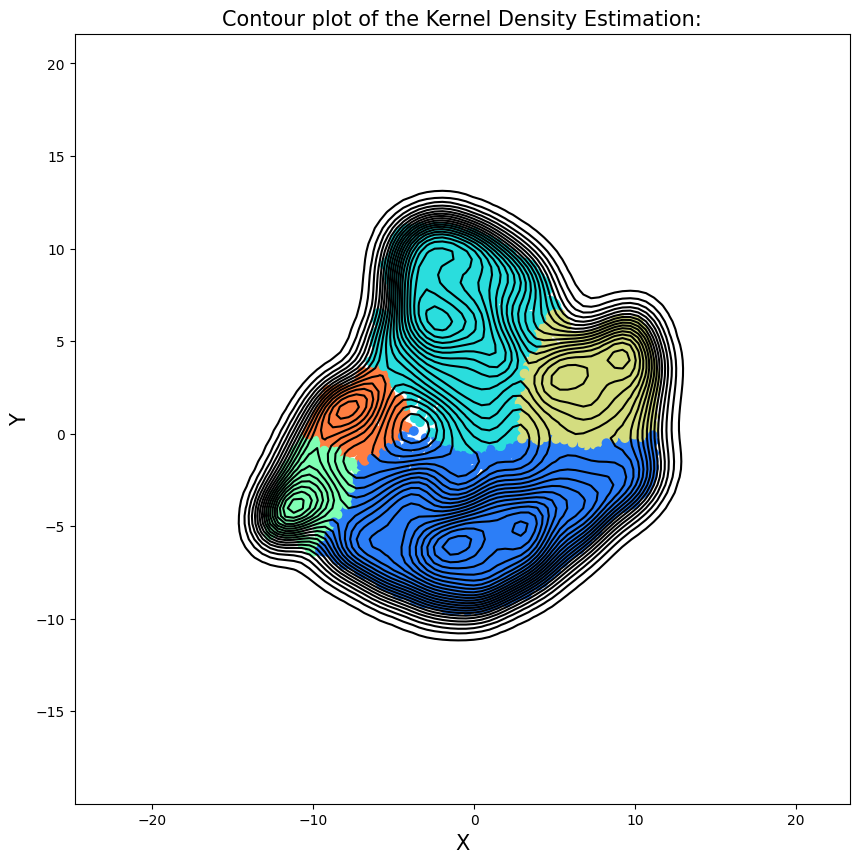

In [9]:
# Plot the clustering outcome
plot_assignment(x = x_points, y = y_points, assignment = clusters, contour = True, levels = 25, xx = xx, yy = yy, f = f)

<IPython.core.display.Javascript object>


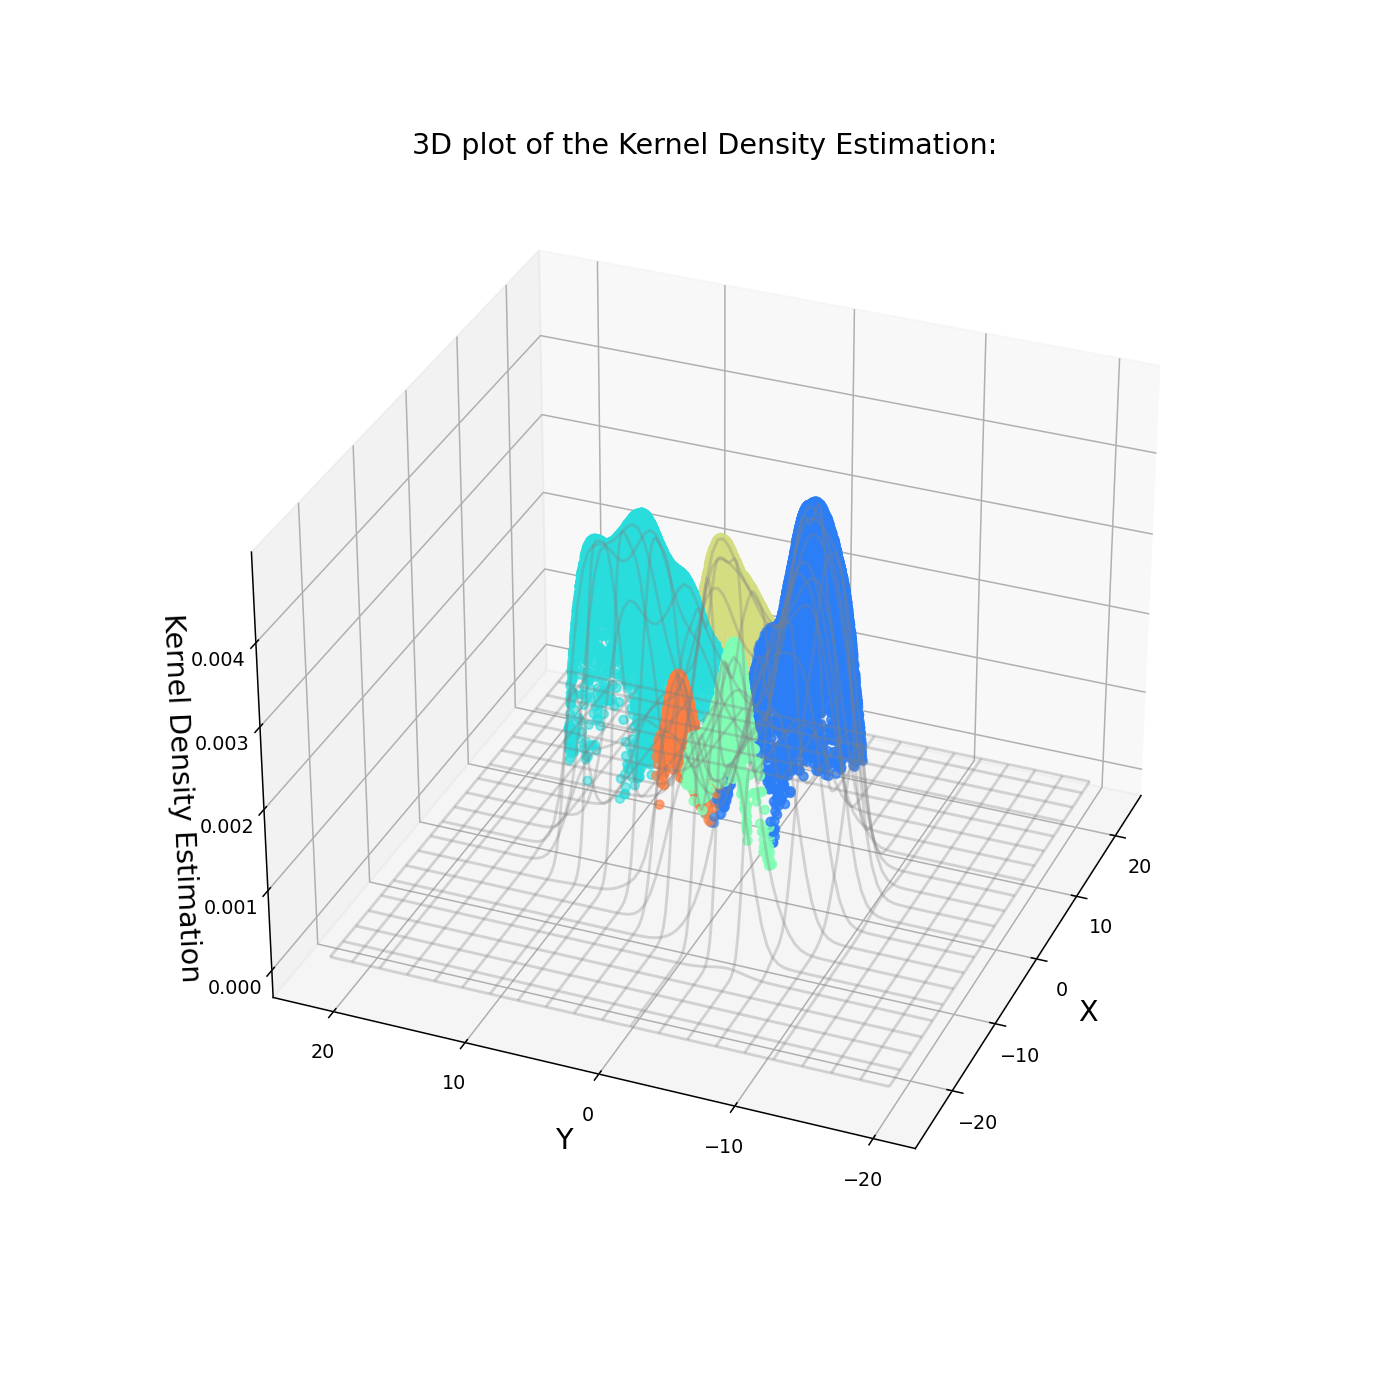

In [10]:
# Plot the clustering outcome overlaid on the KDE function
%matplotlib notebook
plot_assignment_3D(x = x_points, y = y_points, xx = xx, yy = yy, f = f, assignment = clusters, density = density)

In [11]:
# Save an output file
df.to_csv('Output/output.csv', index = None)